## **Isolation Forest**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../Data/tripadvisor_reviews.csv')

In [4]:
data.head()

,user_id,avg_museum_rating,avg_park_rating,avg_restaurant_rating,avg_nightlife_rating
0,User 1,1.93,2.8,3.29,1.62
1,User 2,2.02,3.2,3.66,1.64
2,User 3,2.22,1.8,1.54,1.53
3,User 4,1.45,2.8,1.29,1.57
4,User 5,1.51,2.2,2.18,1.57


In [5]:
data = data.drop('user_id', axis=1)

In [9]:
data.max()

avg_museum_rating        4.22
avg_park_rating          4.64
avg_restaurant_rating    4.62
avg_nightlife_rating     4.44
dtype: float64

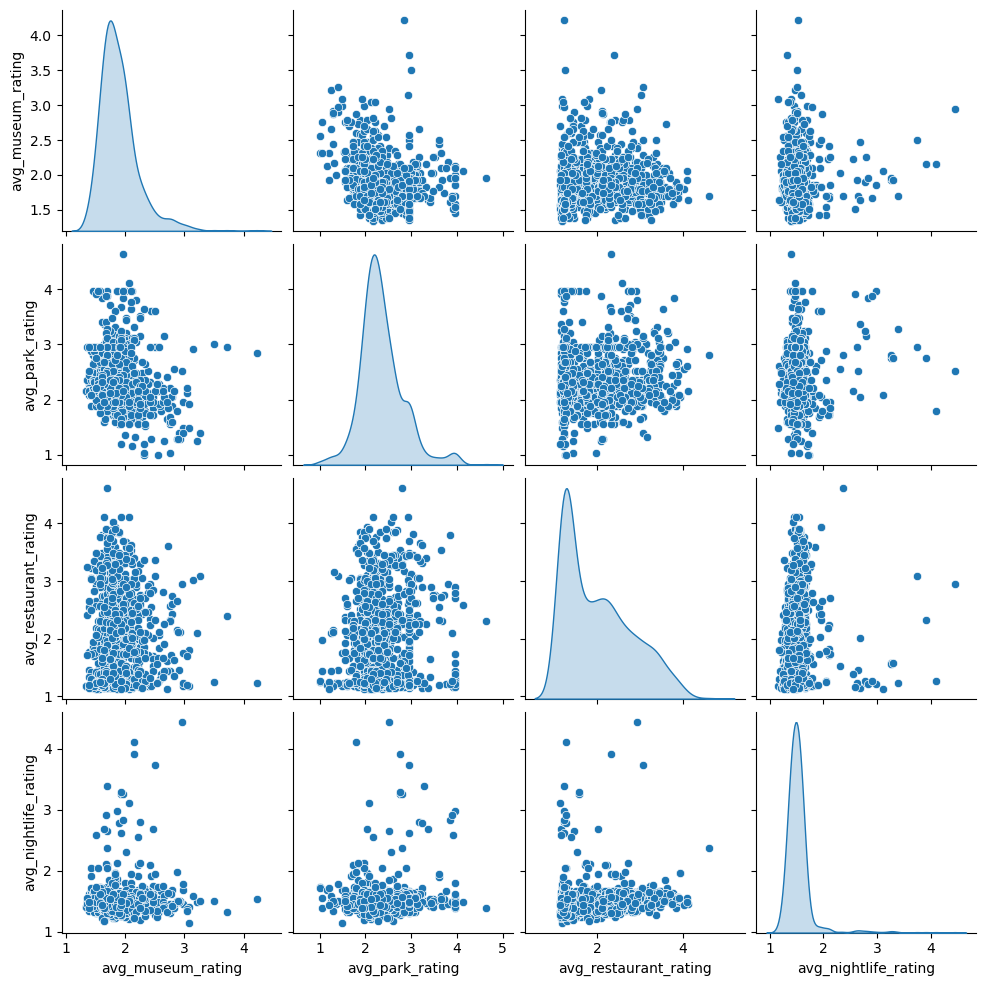

In [11]:
## Visualize the data using pairplot
sns.pairplot(
    data,
    diag_kind='kde'
)
plt.plot();
    


In [16]:
## Fit an Isolation Forest model with a contamonation of 1%

from sklearn.ensemble import IsolationForest

isf = IsolationForest(contamination=0.01, random_state=42, verbose=0)
isf.fit(data)

IsolationForest(contamination=0.01, random_state=42)

In [18]:
data['anomaly_score'] = isf.decision_function(data)
data['anomaly'] = isf.predict(data)

In [21]:
data.sort_values('anomaly_score')

,avg_museum_rating,avg_park_rating,avg_restaurant_rating,avg_nightlife_rating,anomaly_score,anomaly
666,2.95,2.52,2.94,4.44,-0.052977,-1
247,2.50,2.96,3.08,3.73,-0.027739,-1
677,3.26,1.40,3.08,1.50,-0.014623,-1
274,2.15,2.76,2.33,3.91,-0.008317,-1
422,1.51,3.92,1.16,2.58,-0.006843,-1
...,...,...,...,...,...,...
418,1.64,2.24,1.26,1.43,0.283875,1
613,1.67,2.28,1.26,1.51,0.284039,1
22,1.93,2.16,1.29,1.41,0.288733,1
471,1.74,2.28,1.30,1.43,0.291544,1


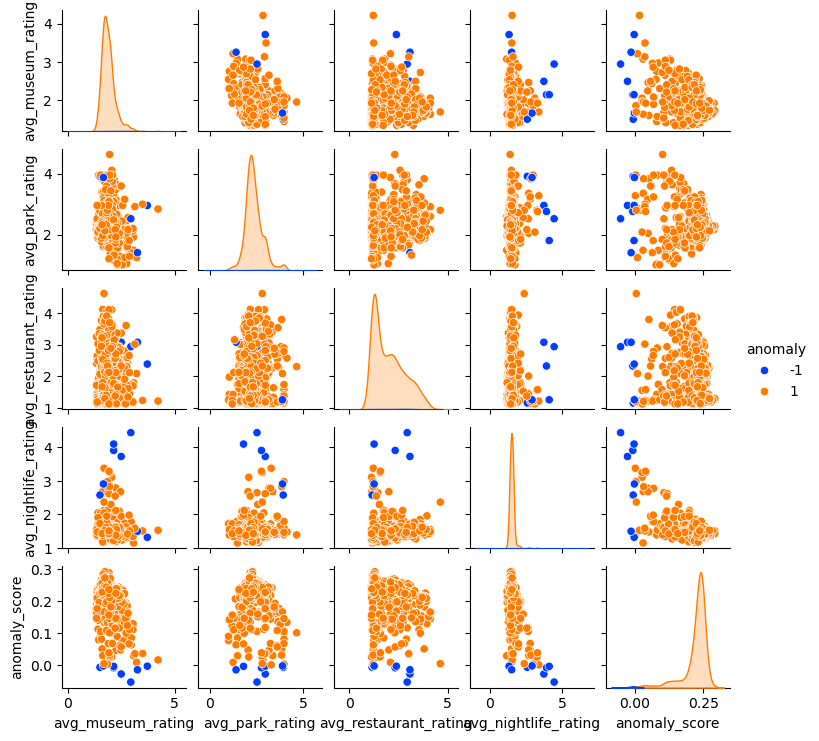

In [27]:
## Visualize the anomalies using seaborn pairplot
sns.pairplot(
    data,
    hue='anomaly',
    diag_kind='kde',
    palette='bright',
    height=1.5
);

In [31]:
isf2 = IsolationForest(contamination=0.005, random_state=42, verbose=0)
isf2.fit(data)

IsolationForest(contamination=0.005, random_state=42)

In [32]:
data['anomaly_score'] = isf2.decision_function(data)
data['anomaly'] = isf2.predict(data)

In [33]:
data.sort_values('anomaly_score')

,avg_museum_rating,avg_park_rating,avg_restaurant_rating,avg_nightlife_rating,anomaly_score,anomaly
666,2.95,2.52,2.94,4.44,-0.033821,-1
903,1.67,3.88,1.26,2.91,-0.011965,1
601,2.15,1.80,1.26,4.10,-0.011025,1
247,2.50,2.96,3.08,3.73,-0.007529,1
677,3.26,1.40,3.08,1.50,-0.000726,1
...,...,...,...,...,...,...
929,1.83,2.24,1.35,1.50,0.387991,1
313,1.77,2.48,2.19,1.49,0.388089,1
148,1.86,2.28,2.01,1.55,0.388201,1
532,1.83,2.20,2.25,1.56,0.389420,1


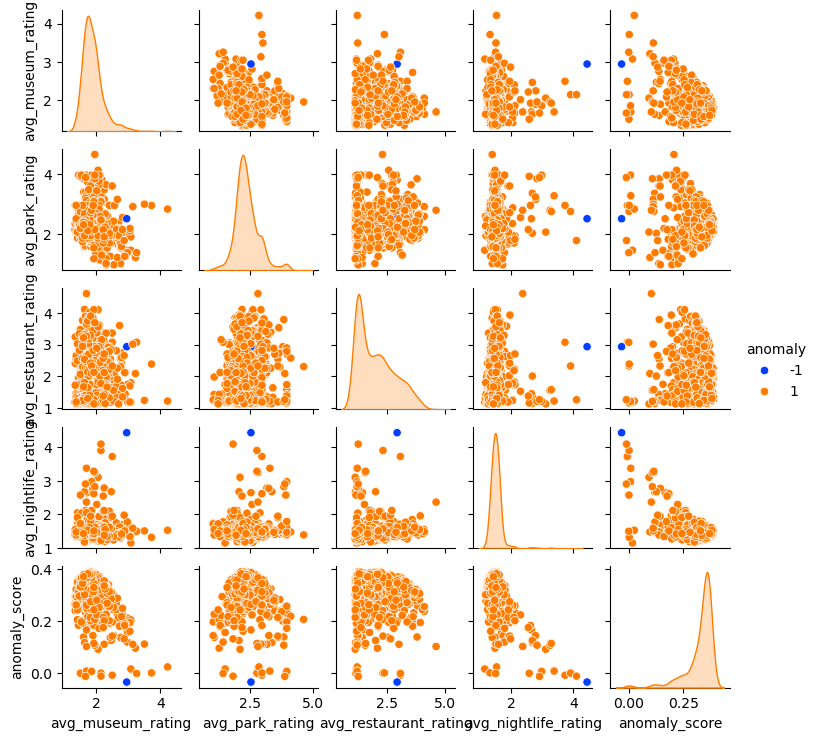

In [35]:
sns.pairplot(
    data,
    hue='anomaly',
    height=1.5,
    palette='bright'
);